# Contributors
Zijian Zhang 14851598 $\\$
Amish Sewlal 13297503 $\\$
Ravi Sharma Kaushik 14332744

# Creating Mandlebrot Set

# Area of Mandlebrot Set using Monte Carlo Method

# Convergence studies for various number of iterations and samples

# Using varous sampling techniques  

# Approach for improving convergence

In [121]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from Mandelbrot_h import whenLeaveMandelbrotSet as wlms
from Mandelbrot import inMandelbrotSet as ims
from MonteCarloIntegration import randomSampling as RS

In [2]:
def RS_circle(iter_num: int, s_num: int, R: int = 2) -> np.ndarray:
    '''Compute the area of the Mandelbrot set by pure random sampling within a circle.
    Parameters:
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        R: the radius of the circle
    Returns:
        A_h: the areas of the Mandelbrot set during the run
    '''
    history = np.zeros((s_num, iter_num))
    # history is the historical data for all samples at each step in the iteration
    for s in range(s_num):
        U1 = np.random.uniform(0, 1)
        U2 = np.random.uniform(0, 1)
        theta = U1 * 2 * math.pi
        r = R * math.sqrt(U2)
        real = r * math.cos(theta)
        imag = r * math.sin(theta)
        c = complex(real, imag)
        j = wlms(c, iter_num)
        # j is the iteration number when c leave the Mandelbrot set
        # If c never leave the Mandelbrot set, j = iter_num
        history[s, :j] = 1

    # Compute the area of the Mandelbrot set
    N_h = history.sum(axis=0)
    # N_h is the number of samples that are in the Mandelbrot set during the run
    A_total = math.pi * R**2  # The area of the sampling region
    A_h = N_h / s_num * A_total

    return A_h


def LHS_circle(iter_num: int, s_num: int, R: int = 2) -> np.ndarray:
    '''Compute the area of the Mandelbrot set by Latin hypercube sampling within a circle.
    Parameters:
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        R: the radius of the circle
    Returns:
        A_h: the areas of the Mandelbrot set during the run
    '''
    idx = np.arange(s_num)
    np.random.shuffle(idx)
    history = np.zeros((s_num, iter_num))
    # history is the historical data for all samples at each step in the iteration
    for s in range(s_num):
        U1 = np.random.uniform(0, 1)
        U2 = np.random.uniform(0, 1)
        # Split the circular sampling region into s sectors, and get the RV: theta
        theta = 2 * math.pi * (s + U1) / s_num
        # Divide the sector into s equal parts of equal area, and get the RV: r
        r = R * math.sqrt((idx[s] + U2) / s_num)
        real = r * math.cos(theta)
        imag = r * math.sin(theta)
        c = complex(real, imag)
        j = wlms(c, iter_num)
        # j is the iteration number when c leave the Mandelbrot set
        # If c never leave the Mandelbrot set, j = iter_num
        history[s, :j] = 1

    # Compute the areas of the Mandelbrot set during the run
    N_h = history.sum(axis=0)
    # N_h is the number of samples that are in the Mandelbrot set during the run
    A_total = math.pi * R**2  # The area of the sampling region
    A_h = N_h / s_num * A_total

    return A_h


def OS_circle(iter_num: int, s_num: int, R: int = 2) -> np.ndarray:
    '''Compute the area of the Mandelbrot set by orthogonal sampling within a circle.
    Parameters:
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        R: the radius of the circle
    Returns:
        A_h: the areas of the Mandelbrot set during the run
    '''
    # Radius of the sampling region
    R = 2

    # Samples has to be a perfect square
    sqr = int(np.floor(np.sqrt(s_num)))
    s_num = sqr**2

    # Create array with minor sectors
    sectors = np.linspace(0, 2 * math.pi, s_num)

    # Randomly shuffle minor sectors
    np.random.shuffle(sectors)

    # Creating major rings
    rings = R * np.sqrt(np.linspace(0, 1, s_num + 1))

    # Creating the historical data for all samples at each step in the iteration
    history = np.zeros((s_num, iter_num))

    # Looping through each major ring
    for i in range(sqr):
        # Creating array with minor rings in current
        low = i * sqr
        high = (i + 1) * sqr
        minor_rings = rings[low:high]

        # Shuffling minor rings
        np.random.shuffle(minor_rings)

        # Looping through each minor ring
        for j in range(sqr):
            # Creating complex number
            s = sqr * i + j
            theta = sectors[s]
            l = minor_rings[j]
            real = l * math.cos(theta)
            imag = l * math.sin(theta)
            c = complex(real, imag)

            # Adding to mandelbrot
            # j is the iteration number when c leave the Mandelbrot set
            # If c never leave the Mandelbrot set, j = iter_num
            j = wlms(c, iter_num)
            history[s, :j] = 1

    # Computing the number of samples that are in the Mandelbrot set during the run
    N_h = history.sum(axis=0)

    # Computing the area of the sampling region
    A_total = math.pi * R**2

    # Computing the areas during the run
    A_h = N_h / s_num * A_total

    return A_h

The first j that achieves the expect accuracy:
OS: 251
OSC: 253


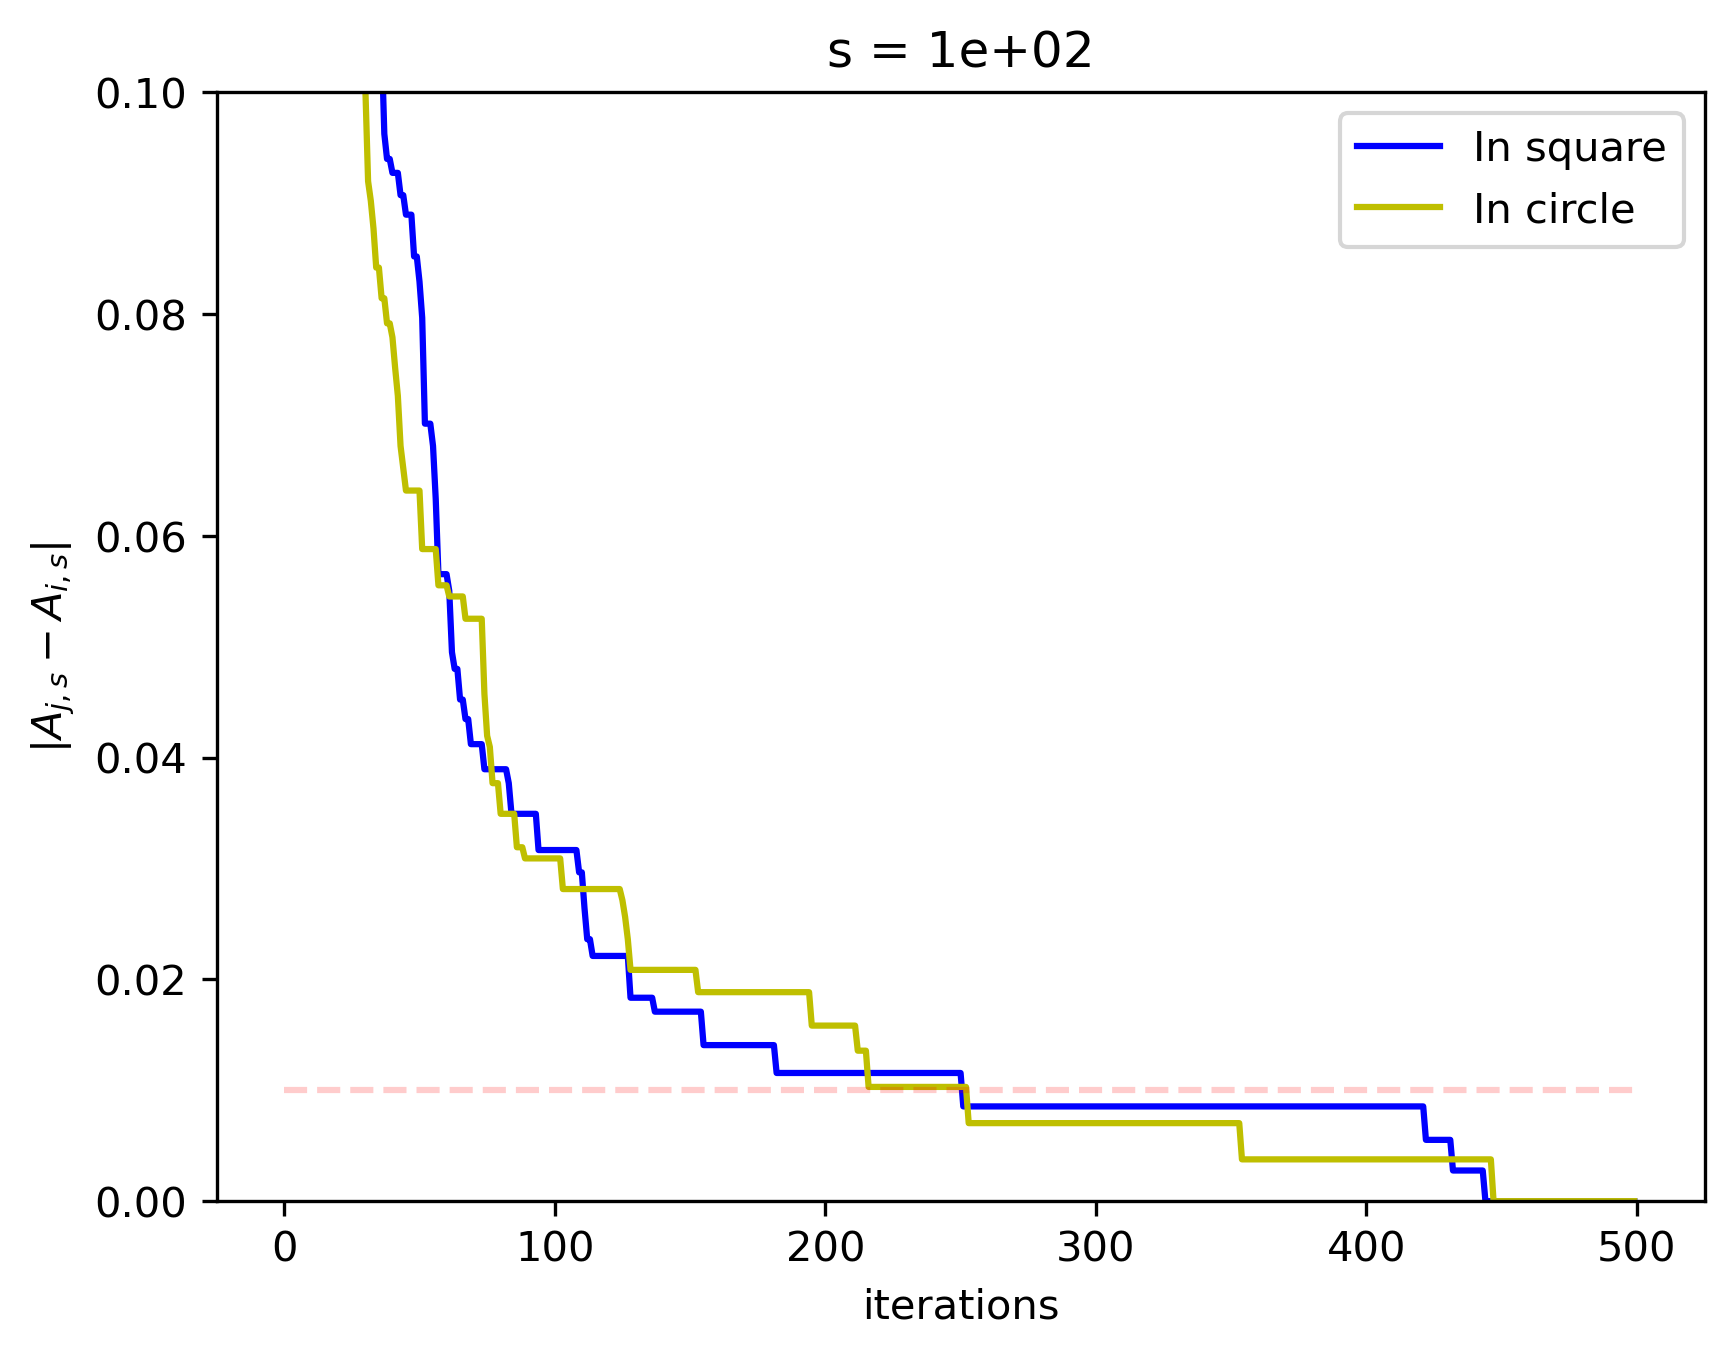

In [3]:
# Compare the convergence rate of the two orthogonal methods with constant s
i = 500  # Max iterations
s = 100  # s is constant
x = np.arange(i)
l = np.sqrt(4 * math.pi) / 2  # Make the sampling area the same size

# 1 for in square, 2 for in circle
y1, y2 = [], []
for k in range(500):
    A_h1 = OS_h(-l, l, i, s)
    A_h2 = OS_circle(i, s, R=2)
    y1.append(np.abs(A_h1 - A_h1[-1]))
    y2.append(np.abs(A_h2 - A_h2[-1]))
mean1 = np.mean(y1, axis=0)
mean2 = np.mean(y2, axis=0)

print("The first j that achieves the expect accuracy:")
expect_acc = 0.01  # Expected accuracy
print("OS:", np.where(mean1 <= expect_acc)[0][0])
print("OSC:", np.where(mean2 <= expect_acc)[0][0])

plt.figure(dpi=300)
plt.plot(x, mean1, label="In square", c='b')
plt.plot(x, mean2, label="In circle", c='y')
plt.hlines(expect_acc, 0, i, linestyle='dashed', color='red', alpha=0.2)
plt.xlabel("iterations")
plt.ylabel(r"$|A_{j,s}-A_{i,s}|$")
plt.title("s = {:.0e}".format(s))
plt.ylim(0, 0.1)
plt.legend()
plt.show()

In [4]:
# # Try to compute the exact value of A_M
# i = 1000
# s = int(1e7)
# A_h = OS_circle(iter_num=i, s_num=s, R=2)
# print(A_h[-1])

In [136]:
# Computing the escape time j
def escape_time(iter_num, s_num, xlow, xhigh, ylow, yhigh):
    sqr = int(np.floor(np.sqrt(s_num)))
    s_num = sqr**2
    col_boundings = np.linspace(xlow, xhigh, sqr + 1)
    row_boundings = np.linspace(ylow, yhigh, sqr + 1)
    js = (iter_num + 1) * np.zeros((sqr, sqr))
    for i in range(sqr):
        for j in range(sqr):
            imag = (row_boundings[i] + row_boundings[i + 1]) / 2
            real = (col_boundings[j] + col_boundings[j + 1]) / 2
            c = complex(real, imag)
            js[i, j] = wlms(c, iter_num)
    return js


In [179]:
def get_edge(js, iter_num, s_num, xlow, xhigh, ylow, yhigh, threshold=6):
    '''Get the edges of Mandelbrot set.
    Parameters:
        js: 
        iter_num: Number of iterations
        s_num: Number of samples
        xlow, xhigh, ylow, yhigh: The boundings of the sampling region
    Returns:
        edge_matrix: A boolean matrix, 1 means in the edge, 0 means not in the edge
    '''
    sqr = int(np.floor(np.sqrt(s_num)))
    s_num = sqr**2
    cond = (js > threshold) & (js < iter_num)
    rows, cols = np.where(cond)
    edge_rows = np.linspace(ylow, yhigh, sqr + 1)[rows]
    edge_cols = np.linspace(xlow, xhigh, sqr + 1)[cols]
    edge_matrix = np.zeros_like(js)
    edge_matrix[rows, cols] = 1
    return edge_matrix, edge_rows, edge_cols

In [152]:
iter_num = 100
s_num = int(1e6)
xlow, xhigh = -2, 1
ylow, yhigh = -1.5, 1.5
sqr = int(np.floor(np.sqrt(s_num)))
js = escape_time(iter_num, s_num, xlow, xhigh, ylow, yhigh)

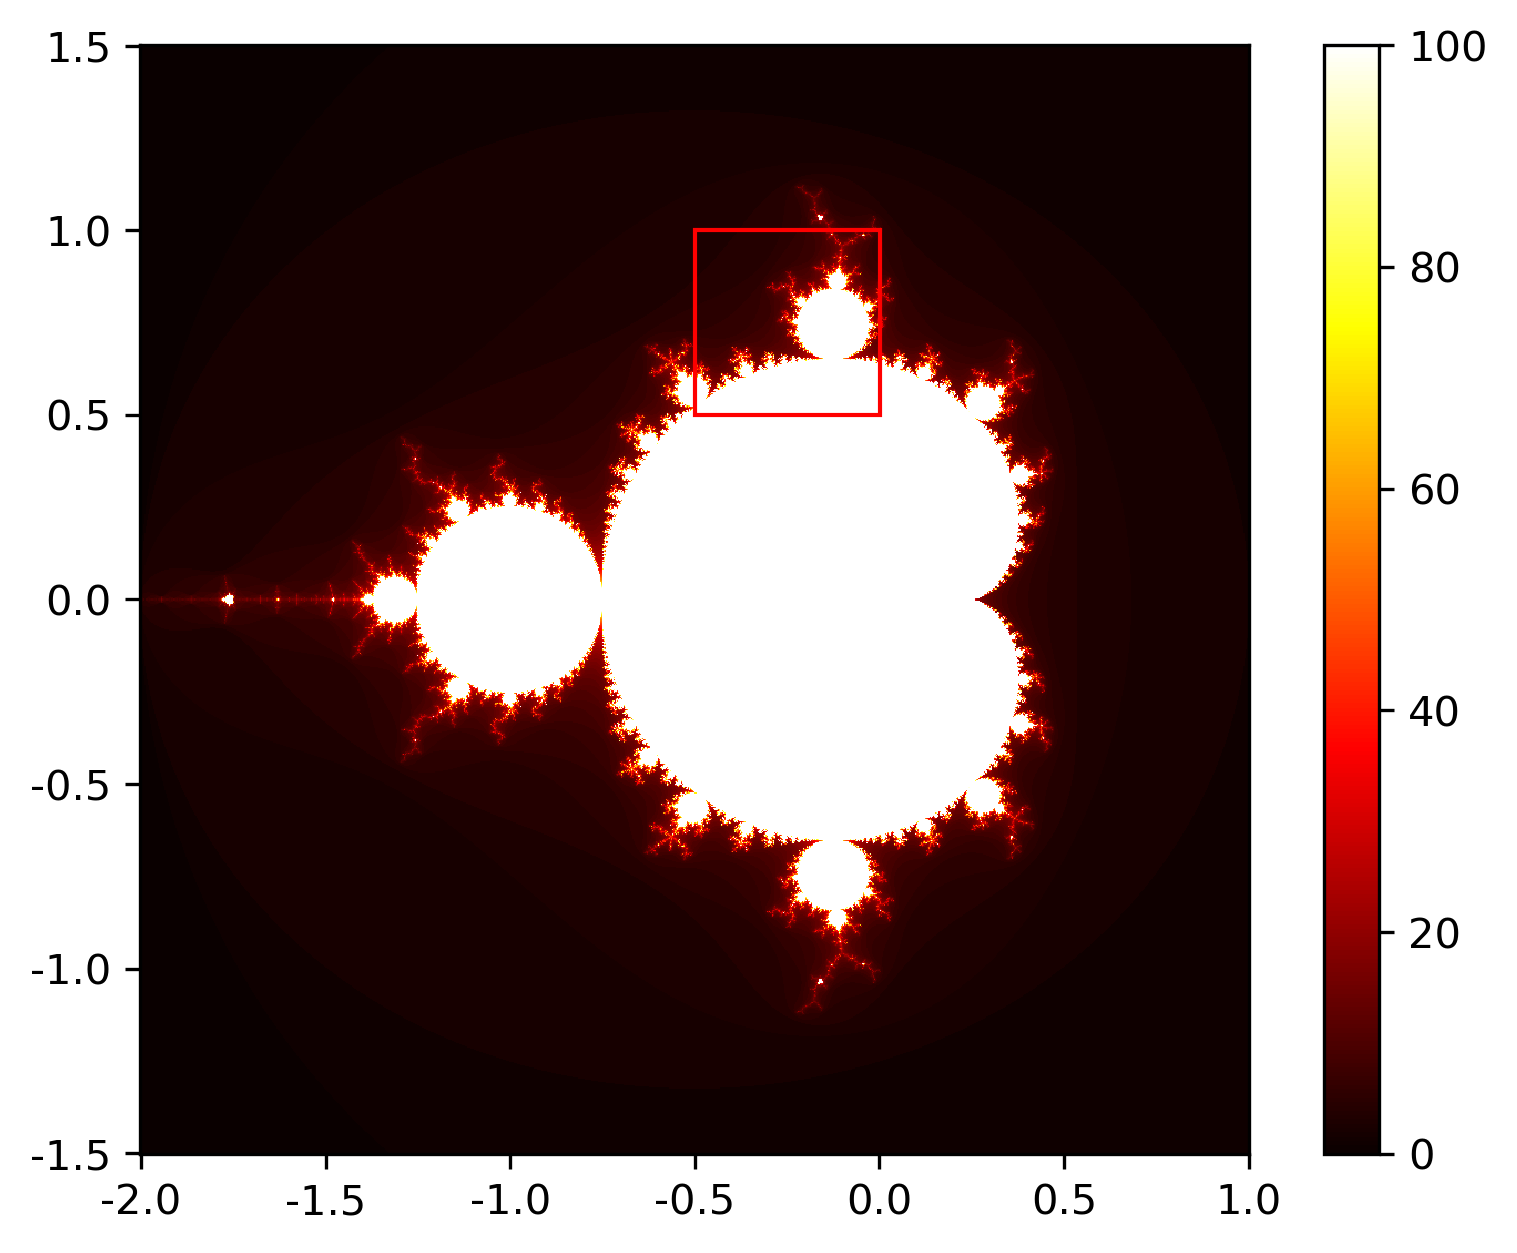

In [153]:
# Global heatmap
fig, ax = plt.subplots(dpi=300)
im1 = ax.imshow(js, cmap='hot', interpolation='nearest')
old_xticks = np.linspace(0, sqr - 1, 7)
old_yticks = np.linspace(sqr - 1, 0, 7)
new_xticks = np.linspace(xlow, xhigh, 7)
new_yticks = np.linspace(ylow, yhigh, 7)
ax.set_xticks(old_xticks, new_xticks)
ax.set_yticks(old_yticks, new_yticks)
rect = plt.Rectangle((sqr / 2, sqr / 6),
                     sqr / 6,
                     sqr / 6,
                     fill=False,
                     edgecolor='red',
                     linewidth=1)
ax.add_patch(rect)
plt.colorbar(im1)
plt.show()

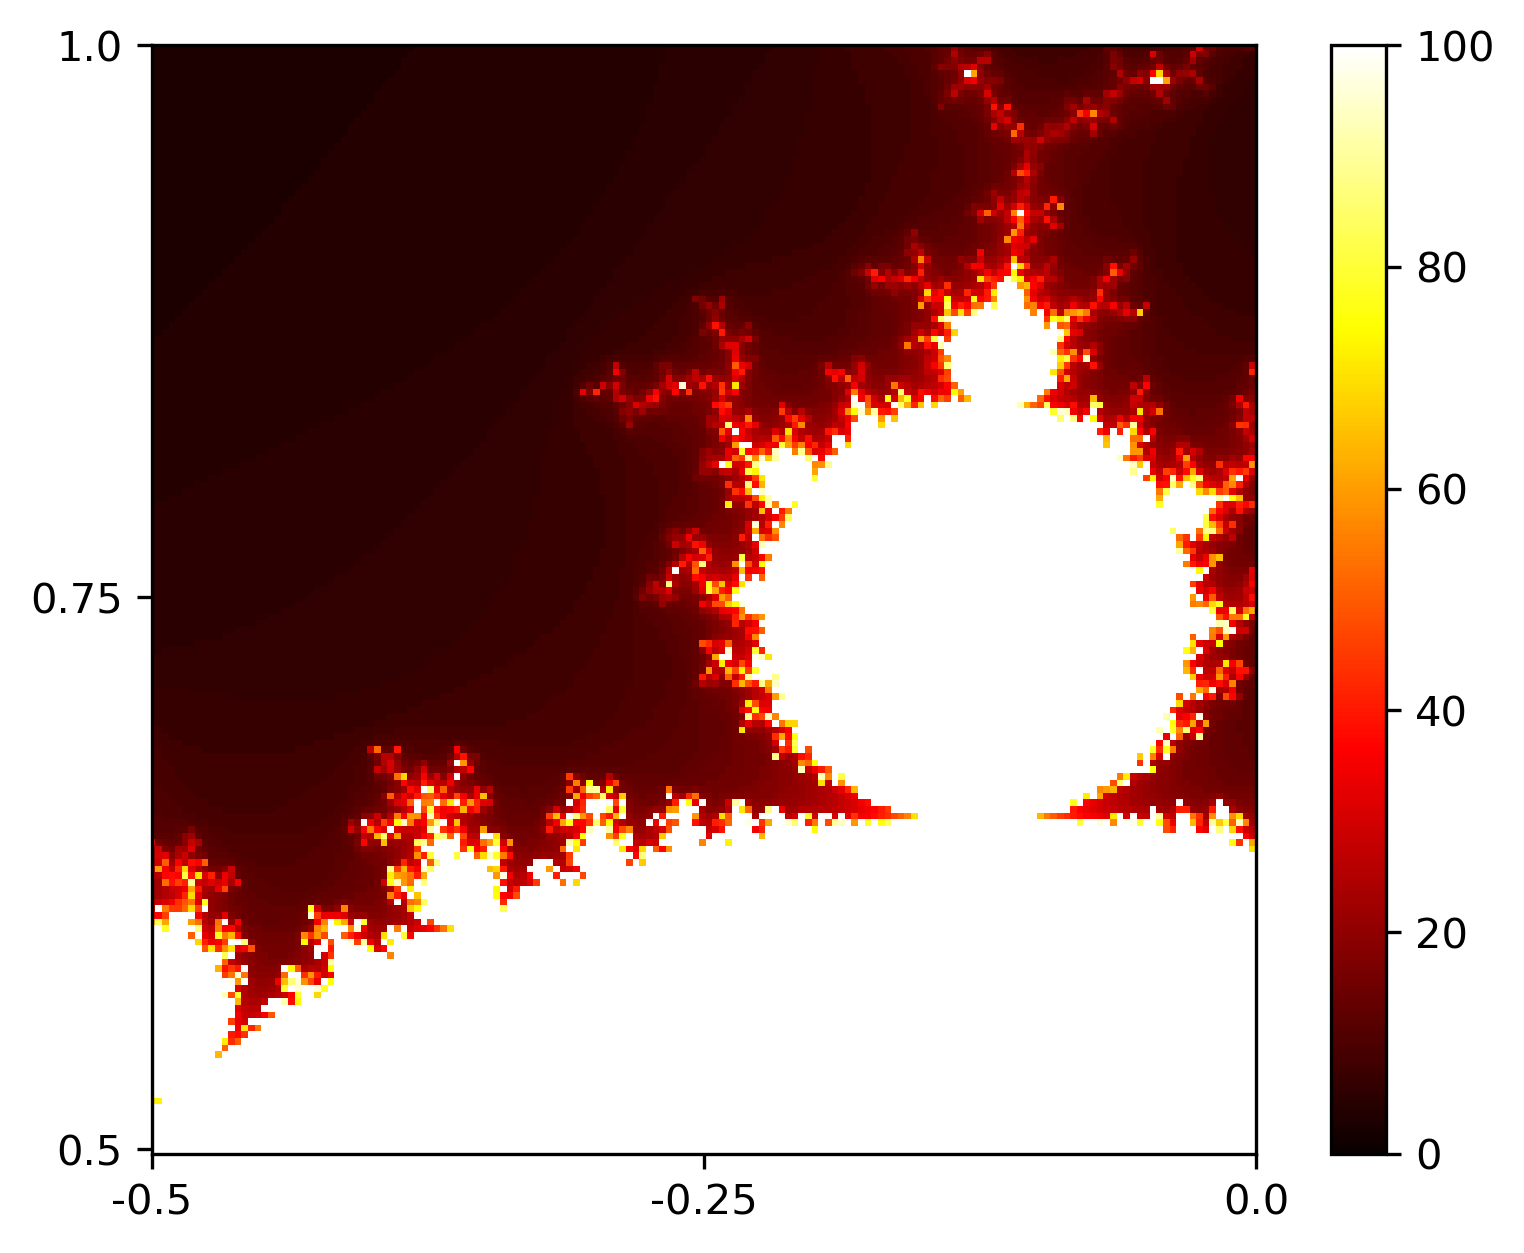

In [154]:
# Local heatmap
plt.figure(dpi=300)
plt.imshow(js, cmap='hot', interpolation='nearest')
plt.xlim(int(sqr / 2), int(sqr / 2 + sqr / 6))
plt.ylim(int(4 / 6 * sqr), int(5 / 6 * sqr))
old_xticks = np.linspace(sqr / 2, sqr / 2 + sqr / 6, 3)
old_yticks = np.linspace(4 / 6 * sqr, 5 / 6 * sqr, 3)
new_xticks = np.linspace(-0.5, 0, 3)
new_yticks = np.linspace(0.5, 1, 3)
plt.xticks(old_xticks, new_xticks)
plt.yticks(old_yticks, new_yticks)
plt.colorbar()
plt.show()

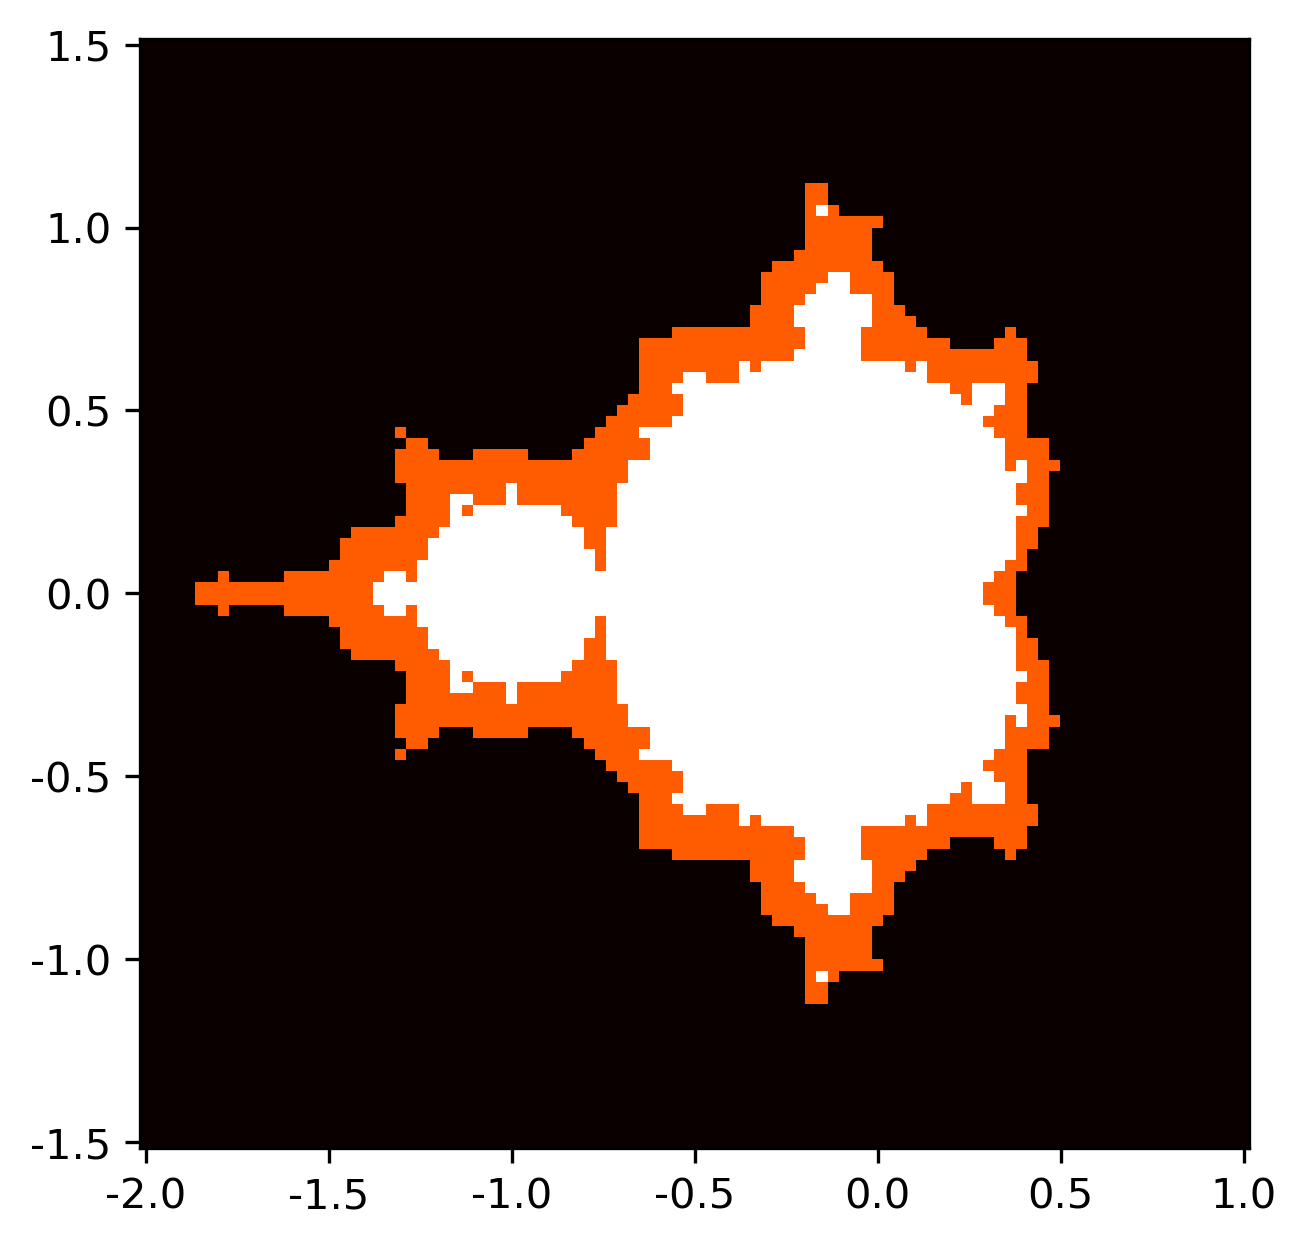

In [178]:
iter_num = 500
s_num = int(1e4)
xlow, xhigh = -2, 1
ylow, yhigh = -1.5, 1.5
sqr = int(np.floor(np.sqrt(s_num)))
js = escape_time(iter_num, s_num, xlow, xhigh, ylow, yhigh)
edge_matrix, _, _ = get_edge(js, iter_num, s_num, xlow, xhigh, ylow, yhigh, threshold=6)
in_Mandelbrot_region = ((js - js * edge_matrix) == iter_num)
regions = np.zeros_like(js)
regions += edge_matrix + 2 * in_Mandelbrot_region

# Global regions
fig, ax = plt.subplots(dpi=300)
ax.imshow(regions, cmap='hot', interpolation='nearest')
old_xticks = np.linspace(0, sqr - 1, 7)
old_yticks = np.linspace(sqr - 1, 0, 7)
new_xticks = np.linspace(xlow, xhigh, 7)
new_yticks = np.linspace(ylow, yhigh, 7)
ax.set_xticks(old_xticks, new_xticks)
ax.set_yticks(old_yticks, new_yticks)
# rect = plt.Rectangle((sqr / 2, sqr / 6),
#                      sqr / 6,
#                      sqr / 6,
#                      fill=False,
#                      edgecolor='red',
#                      linewidth=1)
# ax.add_patch(rect)
plt.show()

In [162]:
# # Local regions
# plt.figure(dpi=300)
# plt.imshow(regions, cmap='hot', interpolation='nearest')
# plt.xlim(int(sqr / 2), int(sqr / 2 + sqr / 6))
# plt.ylim(int(4 / 6 * sqr), int(5 / 6 * sqr))
# old_xticks = np.linspace(sqr / 2, sqr / 2 + sqr / 6, 3)
# old_yticks = np.linspace(4 / 6 * sqr, 5 / 6 * sqr, 3)
# new_xticks = np.linspace(-0.5, 0, 3)
# new_yticks = np.linspace(0.5, 1, 3)
# plt.xticks(old_xticks, new_xticks)
# plt.yticks(old_yticks, new_yticks)
# plt.show()

In [172]:
def heuristicSampling(iter_num,
                      s_num,
                      xlow,
                      xhigh,
                      ylow,
                      yhigh,
                      frac_find_edge=0.01):
    '''Compute the area of the Mandelbrot set by heuristic sampling.
    Parameters:
        iter_num: Number of iterations
        s_num: Number of samples
        xlow, xhigh, ylow, yhigh: The boundings of the sampling region
        frac_find_edge: The fraction of samples that are used to find the edge
    Returns:
        A: the areas of the Mandelbrot set
    '''
    # Compute the total area of the sampling region
    A_total = (xhigh - xlow) * (yhigh - ylow)
    # Use some samples to find the edge and calculate the area within the edge
    s_find_edge = frac_find_edge * s_num
    sqr = int(np.floor(np.sqrt(s_find_edge)))
    s_find_edge = sqr**2  # s_find_edge should be a perfect square
    js = escape_time(iter_num, s_find_edge, xlow, xhigh, ylow, yhigh)
    edge_matrix, edge_rows, edge_cols = get_edge(js, iter_num, s_find_edge,
                                                 xlow, xhigh, ylow, yhigh)
    # Compute the area within the edge
    A_within_edge = np.sum(
        (js - js * edge_matrix) == iter_num) / s_find_edge * A_total
    # Compute the area on edge
    N = 0
    edge_grid_num = len(
        edge_rows)  # Number of grids that are on edge (the red region)
    grid_width = (xhigh - xlow) / sqr
    grid_height = (yhigh - ylow) / sqr
    # Compute the area of grids that are on edge (the area of the red region)
    edge_grid_area = grid_height * grid_width * edge_grid_num
    # Compute the number of samples in per grid
    s_per_grid = int(np.floor((1 - frac_find_edge) * s_num / edge_grid_num))
    for row, col in zip(edge_rows, edge_cols):
        for s in range(s_per_grid):
            imag = np.random.uniform(row, row + grid_height)
            real = np.random.uniform(col, col + grid_width)
            c = complex(real, imag)
            N += ims(c=c, iterations=iter_num)
    A_edge = N / (s_per_grid * edge_grid_num) * edge_grid_area
    A = A_within_edge + A_edge

    return A


In [174]:
A = RS(-2, 2, 200, int(1e6))
A1 = heuristicSampling(200, int(1e6), -2, 2, -2, 2, frac_find_edge=0.1)
A2 = heuristicSampling(200, int(1e6), -2, 2, -2, 2, frac_find_edge=0.05)
A3 = heuristicSampling(200, int(1e6), -2, 2, -2, 2, frac_find_edge=0.01)
print(A, A1, A2, A3)

1.52792 1.5504296919271068 1.5623532115494552 1.5574846927374302


1.519648 1.5294703571907287 1.528011108120999 1.5274497683966333
